<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/btc_cenarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import random
import sys

In [2]:
sys.path.append('/content/sample_data/')

In [3]:
from my_func_pkg import mean_exp, exp_change, progress_iterable_condition, min_max_cenarios, build_cenarios

In [4]:
btc = yf.download('BTC-USD', interval='1D')

[*********************100%***********************]  1 of 1 completed


In [5]:
import time

In [6]:
c1 = build_cenarios(btc['Close'].values, num_of_cenarios=2000)

100%|██████████| 2000/2000 [09:08<00:00,  3.65it/s]


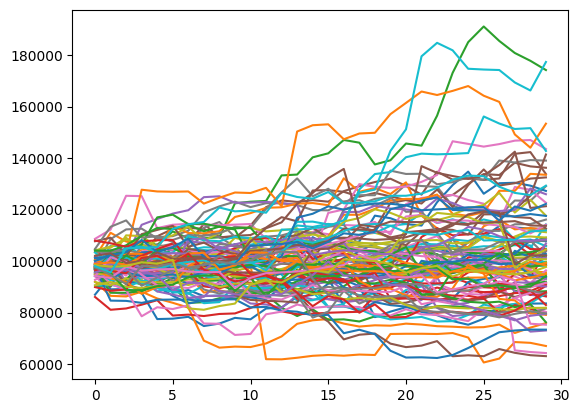

In [7]:
plt.plot(c1[:,:100])


In [8]:
c2 = build_cenarios(btc['Close'].values, num_of_cenarios=2000, addin=False)


100%|██████████| 2000/2000 [09:03<00:00,  3.68it/s]


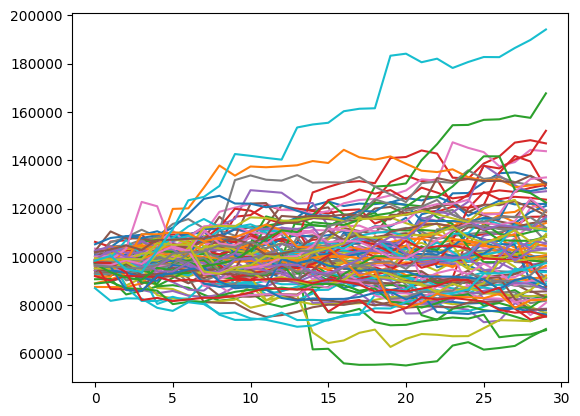

In [9]:
plt.plot(c2[:,:100])


In [10]:
def trend_position_proba(inp_data, len_day: int = 1, only_end: bool = False):
    #p_x = progress_iterable_condition(inp_data_)
    #assert p_x[0]
    #inp_data = p_x[1]
    days = inp_data.shape[0]
    sens = inp_data.shape[1]
    avg = [np.mean(inp_data[i, :]) for i in range(inp_data.shape[0])]
    ups_first = []
    downs_first = []
    ups_end = []
    downs_end = []
    for i in range(sens):
        if list(inp_data[:len_day, i]) > avg[:len_day]:
            ups_first.append(i)
        if list(inp_data[:len_day, i]) < avg[:len_day]:
            downs_first.append(i)
        if not only_end:
            if list(inp_data[-len_day:, i]) > avg[-len_day:]:
                ups_end.append(i)
            if list(inp_data[-len_day:, i]) < avg[-len_day:]:
                downs_end.append(i)
        else:
            if inp_data[-1:, i] > avg[-1:]:
                ups_end.append(i)
            if inp_data[-1:, i] < avg[-1:]:
                downs_end.append(i)

    ups_first = np.array(ups_first)
    downs_first = np.array(downs_first)
    ups_end = np.array(ups_end)
    downs_end = np.array(downs_end)
    k_static = 0
    k_dynamic = 0
    for i in range(sens):
        if i in ups_first and i in ups_end:
            k_static += 1
        if i in downs_first and i in downs_end:
            k_static += 1
        if i in downs_first and i in ups_end:
            k_dynamic += 1

    #return ups_first, ups_end, downs_first, downs_end
    #return (np.sum(ups_first==ups_end)+np.sum(downs_first==downs_end))/sens
    return k_static / sens, k_dynamic / sens


In [11]:
trend_position_proba(c1, len_day=1)

(0.546, 0.219)

In [12]:
trend_position_proba(c2, len_day=1)


(0.5595, 0.2045)

In [18]:
trend_position_proba(c1,len_day=3)

(0.539, 0.2225)

In [19]:
trend_position_proba(c2, len_day=3)

(0.564, 0.205)

In [13]:
trend_position_proba(c1,len_day=3,only_end=True)


(0.546, 0.219)

In [14]:
trend_position_proba(c2, len_day=3,only_end=True)

(0.5595, 0.2045)

In [15]:
dt1 = []
dt2 = []
for i in range(1, 10):
    dt1.append(trend_position_proba(c1, i)[0])
    dt2.append(trend_position_proba(c2, i)[0])

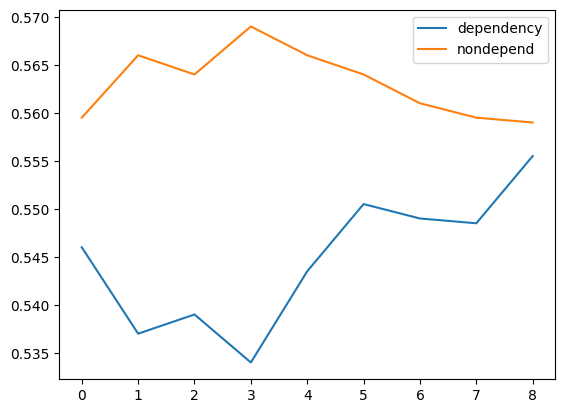

In [16]:
plt.plot(dt1)
plt.plot(dt2)
plt.legend(['dependency', 'nondepend'])